In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import math

In [7]:
df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")

In [8]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


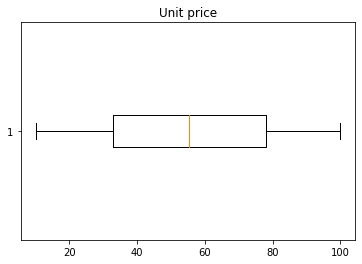

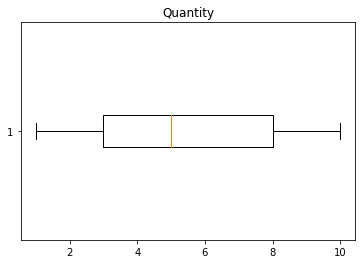

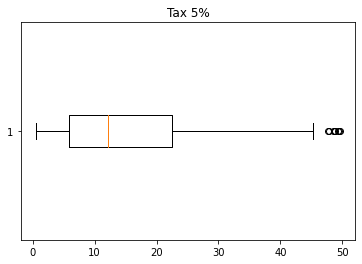

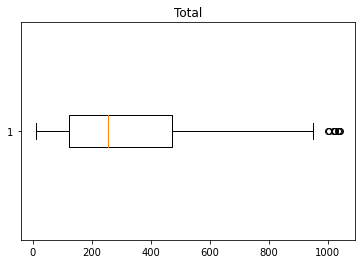

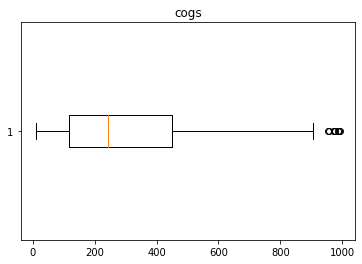

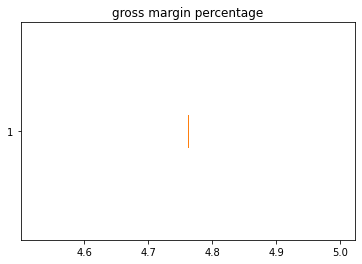

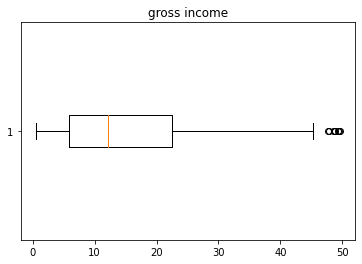

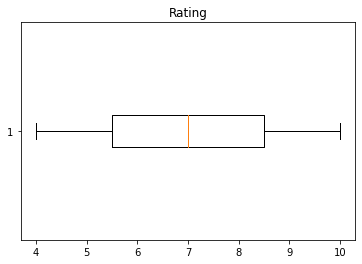

In [11]:
for i in df.describe().columns:
  plt.title(i)
  plt.boxplot(df[i], vert = False)
  plt.show()

In [12]:
# fig, axs = plt.subplots(2, 2, sharey=True)
#df['Tax 5%'].plot(kind='box', ax=axs[0])
#df['Total'].plot(kind='box', ax=axs[1])
#df['cogs'].plot(kind='box', ax=axs[2])
#df['gross income'].plot(kind='box', ax=axs[3])

In [14]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#df.plot(kind='box', x='Total', ax=axs[0], figsize=(16, 8))

In [15]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# **Question 1:** What does the customer rating look like and is it skewed?

<AxesSubplot:>

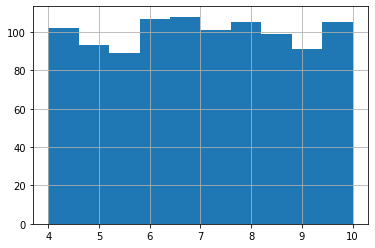

In [16]:
df['Rating'].hist()

<AxesSubplot:xlabel='Rating', ylabel='Density'>

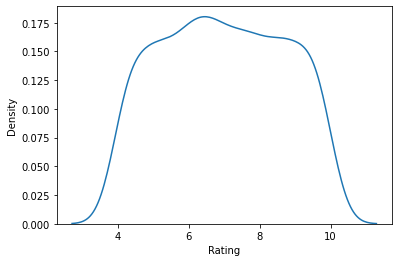

In [17]:
sns.kdeplot(df['Rating'])

Yes, It is little right skewed.

# **Question 2:** Is there any difference in aggregate sales across branches?

In [18]:
agg_sales = df.groupby('Branch').agg({'cogs':'sum'})

In [19]:
agg_sales

,cogs
Branch,
A,101143.21
B,101140.64
C,105303.53


<AxesSubplot:xlabel='Branch'>

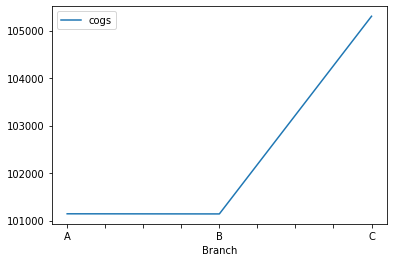

In [20]:
agg_sales.plot(kind = 'line')

Branch C has the highest aggregate compared to the remianing two branches.

# **Question 3:** Which is the most popular payment method used by customers?

In [21]:
popular_payment = df.groupby('Payment').agg({'Payment':'count'})

<AxesSubplot:xlabel='Payment'>

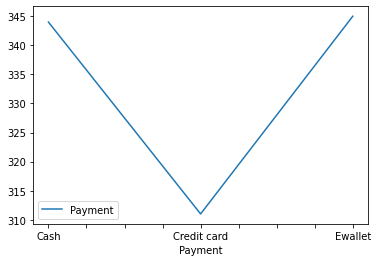

In [22]:
popular_payment.plot(kind = 'line')

Ewallet is the most popularly used payment method by customers.

# **Question 4:** Does gross income affect the ratings that the customers provide?

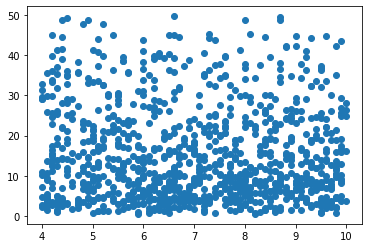

In [23]:
plt.scatter(df['Rating'], df['gross income'])

In [24]:
new = df.pivot('Rating', 'gross income')

No, Gross income has no relation with Rating and does not get affected by ratings given by customers.

# **Question 5:** Which branch is the most profitable?

<AxesSubplot:xlabel='Branch'>

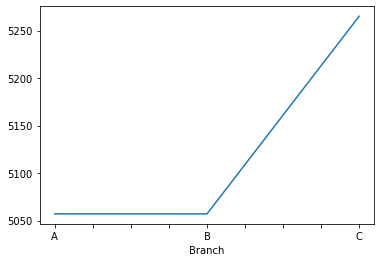

In [27]:
df.groupby(['Branch'])['gross income'].sum().plot(kind = 'line')

Branch C is the most profitable among A, B, C.

# **Question 6:** Is there any relationship between Gender and Gross income?

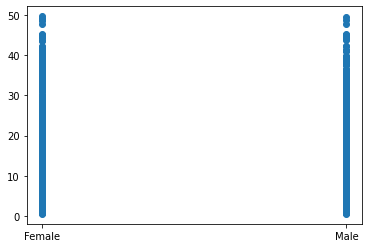

In [28]:
plt.scatter(x = df['Gender'], y = df['gross income'])

There is no relation between Gender and Gross Income.

# **Question 7:** Is there any time trend in gross income?

In [29]:
df.groupby(['Time'])['gross income'].count()

Time
10:00    3
10:01    2
10:02    3
10:03    1
10:04    1
        ..
20:52    1
20:54    2
20:55    1
20:57    1
20:59    2
Name: gross income, Length: 506, dtype: int64

<AxesSubplot:xlabel='Time'>

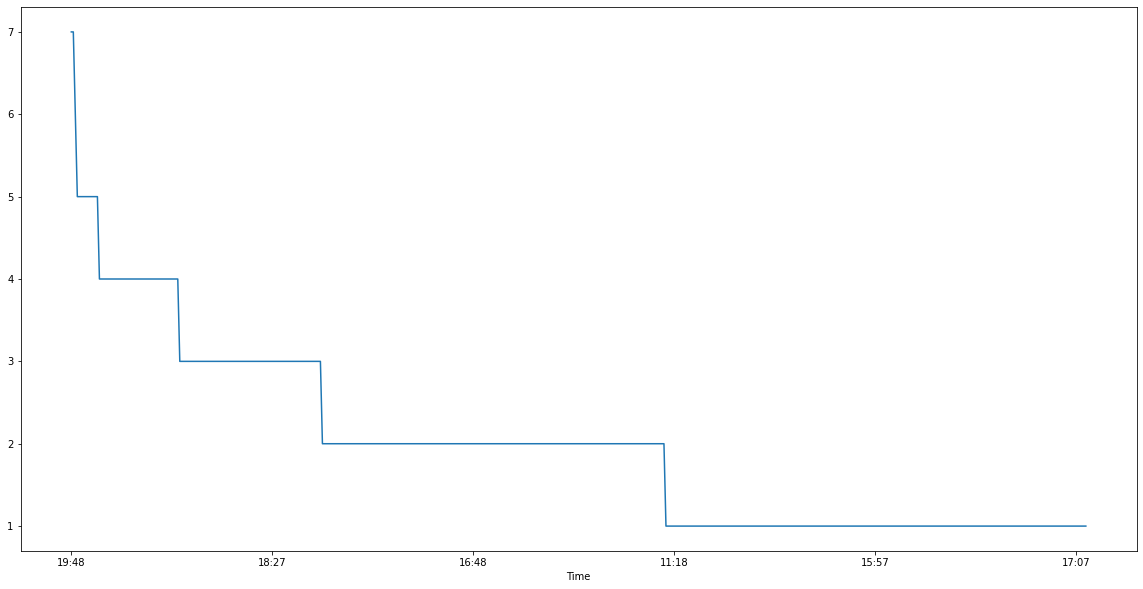

In [30]:
df.groupby(['Time'])['gross income'].count().sort_values(ascending = False).plot(kind='line', figsize = (20, 10))

<AxesSubplot:xlabel='Time'>

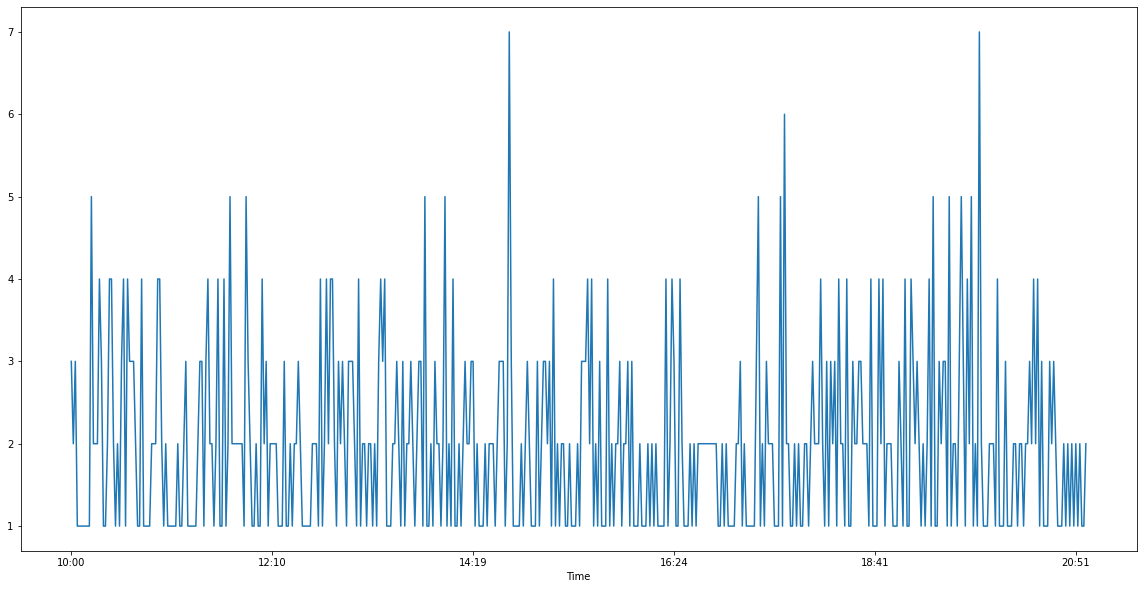

In [31]:
df.groupby(['Time'])['gross income'].count().plot(kind='line', figsize = (20, 10))

Everyday at night around 8 pm we can see highest gross income recorded and the lowest during the evening time around 5 pm.

# **Question 8:** Which product line generates most income?

<AxesSubplot:xlabel='Product line'>

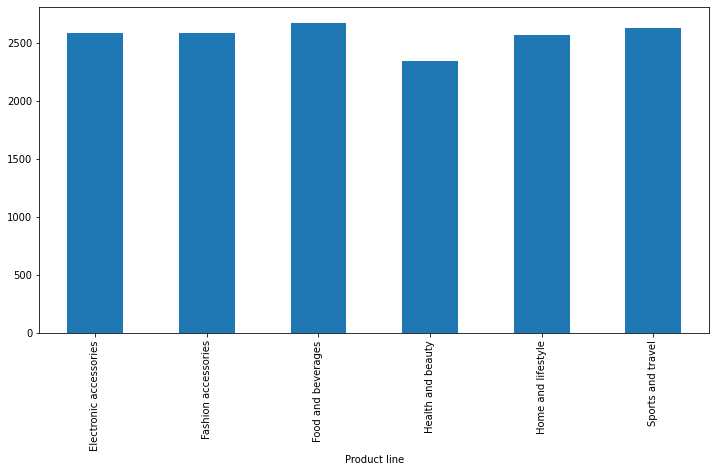

In [32]:
df.groupby(['Product line'])['gross income'].sum().plot(kind = 'bar', figsize = (12, 6))

The Food and Beverages Product line has generated the highest income.

# **Question 9:** What is the spending pattern of females and males and in which category do they spend a lot?

<AxesSubplot:ylabel='Gender,Product line'>

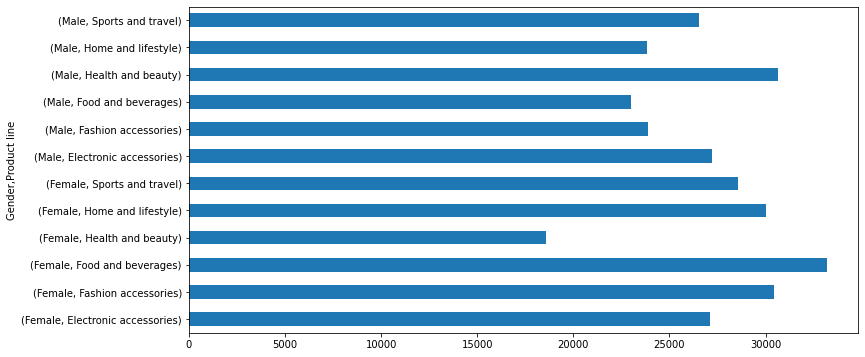

In [33]:
df.groupby(['Gender', 'Product line'])['Total'].sum().plot(kind = 'barh', figsize = (12, 6))

Males are spending more on Health and Beauty.
Whereas Females are spending more on Food and Beverages.

# **Question 10:** How many products are bought by customers?

<AxesSubplot:ylabel='Customer type,Product line'>

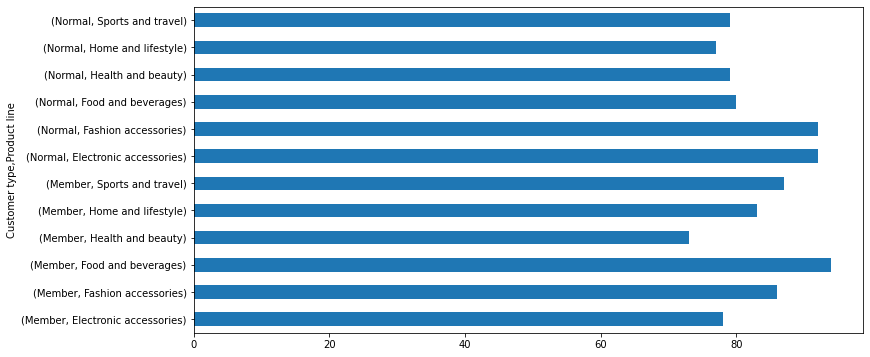

In [34]:
df.groupby(['Customer type', 'Product line'])['Quantity'].count().plot(kind = 'barh', figsize = (12, 6))

# **Question 11:** Which day of the week has maximum sales?

# Question 12:

<AxesSubplot:xlabel='City,Product line'>

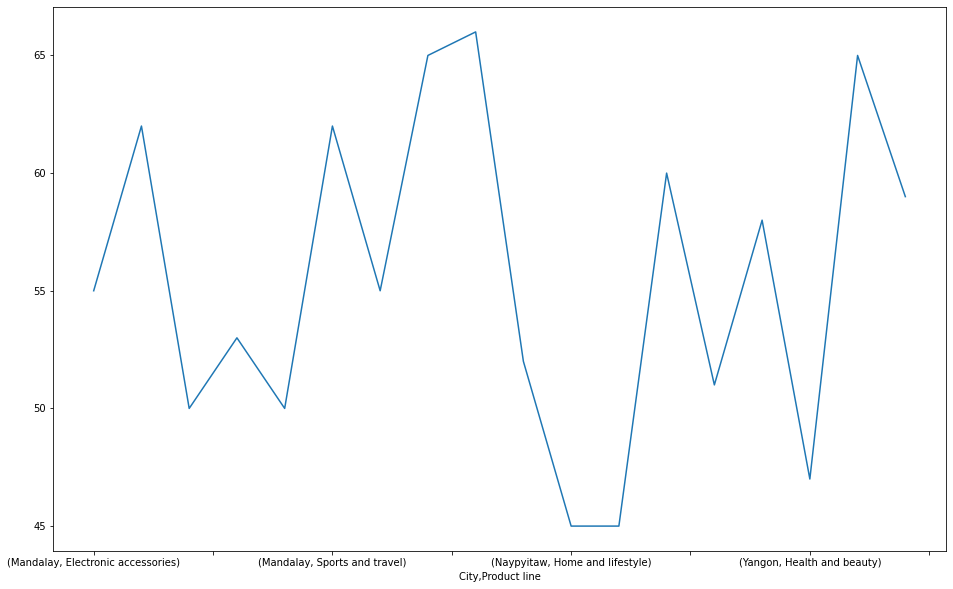

In [35]:
df.groupby(['City', 'Product line'])['Product line'].count().plot(kind = 'line', figsize = (16, 10))

Naypyitaw City should be focussed more in Home and Lifestyle as it records the highest.

In [36]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
